In [2]:
import pandas as pd
file_path = "./lending_club_data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv"
df = pd.read_csv(file_path, low_memory=False, nrows=5000)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (5000, 151)
Columns: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_stat

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['loan_status'].value_counts()


loan_status
Fully Paid            3637
Charged Off            816
Current                514
Late (31-120 days)      29
In Grace Period          3
Late (16-30 days)        1
Name: count, dtype: int64

In [4]:
# look only at fully paid and charged off
df_binary = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

#Target variable: Charged Off → 1, Fully Paid → 0
df_binary['default'] = df_binary['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

#
print(df_binary['default'].value_counts())
df_binary[['loan_status', 'default']].head(5)


default
0    3637
1     816
Name: count, dtype: int64


,loan_status,default
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0


In [5]:
selected_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'emp_length', 'home_ownership',
    'annual_inc', 'purpose', 'dti', 'default'
]

df_model = df_binary[selected_cols].copy()


In [6]:
#Preprocessing--> handlin NAn to 'unknown'
df_model['emp_length'] = df_model['emp_length'].fillna('Unknown')
#changing string to float(number)
df_model_encoded = pd.get_dummies(df_model, drop_first=True)

In [7]:
df_model_encoded = pd.get_dummies(df_model, drop_first=True)

In [8]:
X = df_model_encoded.drop('default', axis=1)
y = df_model_encoded['default']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.66      0.76       728
           1       0.29      0.63      0.40       163

    accuracy                           0.65       891
   macro avg       0.59      0.64      0.58       891
weighted avg       0.78      0.65      0.69       891

[[479 249]
 [ 60 103]]


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#True Negatives (479): 479 loans were actually fully paid and were correctly predicted as non-defaults.
#False Positives (249): 249 loans were fully paid but were incorrectly predicted as defaults. These are false alarms.

#True Positives (103): 103 loans actually defaulted and were correctly predicted as defaults — these are the most important from a risk management perspective.

#False Negatives (60): 60 loans defaulted but the model failed to detect them, predicting them as non-defaults.

In [10]:
import numpy as np

coefficients = pd.Series(model.coef_[0], index=X.columns)
important_features = coefficients.sort_values(ascending=False)

print(important_features.head(10))  # 10 variables that attributed
print(important_features.tail(10))  # 가장 상환에 기여한 변수들


term_ 60 months        0.793407
home_ownership_RENT    0.467002
sub_grade_C4           0.449649
home_ownership_OWN     0.413334
grade_D                0.362553
sub_grade_B5           0.328702
emp_length_6 years     0.267519
grade_C                0.252970
sub_grade_D5           0.247106
sub_grade_D4           0.226128
dtype: float64
emp_length_Unknown         -0.291202
purpose_major_purchase     -0.339231
sub_grade_A4               -0.407179
purpose_credit_card        -0.419699
purpose_home_improvement   -0.434458
sub_grade_A3               -0.435350
sub_grade_A5               -0.461847
emp_length_< 1 year        -0.584887
purpose_other              -0.631669
sub_grade_A2               -0.671144
dtype: float64


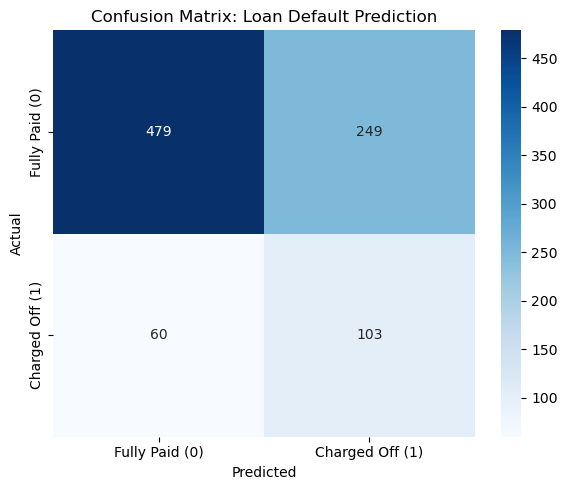

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 예측값 & 실제값 기반 confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 라벨 이름 지정
labels = ['Fully Paid (0)', 'Charged Off (1)']

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Loan Default Prediction')
plt.tight_layout()
plt.show()


In [1]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


NameError: name 'X_train' is not defined